In [1]:
import paho.mqtt.client as mqtt
import traceback
import psycopg2

broker_source = "127.0.0.1"
broker_source_port = 1883

client_source = mqtt.Client()
client_source.username_pw_set("admin", "admin")

DatabaseHostName = 'localhost'
DatabaseUserName = 'admin'
DatabasePassword = 'password'
DatabaseName = 'mqtt'
DatabasePort = 15432

print("Connecting to database")
connection = psycopg2.connect(
	host = DatabaseHostName,
	user = DatabaseUserName,
	password = DatabasePassword,
	database = DatabaseName,
	port = DatabasePort
)

def insertIntoDatabase(message):
	"Inserts the mqtt data into the database"
	with connection.cursor() as cursor:
		print("Inserting data: " + str(message.topic) + ";" + str(message.payload)[2:][:-1] + ";" + str(message.qos))
		cursor.callproc('InsertIntoMQTTTable', [str(message.topic), str(message.payload)[2:][:-1], int(message.qos)])
		connection.commit()

def on_message(client, userdata, message):
	"Evaluated when a new message is received on a subscribed topic"
	print("Received message '" + str(message.payload)[2:][:-1] + "' on topic '"
		+ message.topic + "' with QoS " + str(message.qos))
	insertIntoDatabase(message)
	
def setup():
	"Runs the setup procedure for the client"
	print("Setting up the onMessage handler")
	client_source.on_message = on_message
	print("Connecting to source")
	client_source.connect(broker_source, broker_source_port)
	client_source.subscribe("#", qos=1)
	print("Setup finished, waiting for messages...")


Connecting to database


In [11]:
setup()

Setting up the onMessage handler
Connecting to source
Setup finished, waiting for messages...


In [2]:
def on_message(client, userdata, message):
    print(message.payload, message.payload.decode(), message.topic, message.qos)


In [15]:
client_source.on_message = on_message


In [21]:
from math import sin
def X(t):
    return sin(t)+2*sin(3*t)

X(5)

0.3416514056510952

In [37]:
from datetime import datetime
from time import sleep

a = []
for i in range(50):
    hour = datetime.now().strftime('%M %S').split(' ')
    hour = int(hour[0])*60 + int(hour[1])
    a.append(X(hour))
    sleep(2)



In [2]:
a =[-1.1886732506710955,
 -0.48584528431138496,
 -2.4098476326085394,
 -2.407967189823626,
 -0.9918640650251712,
 -2.248065604860655,
 -2.257690034581442,
 -0.22462359240773422,
 -0.7915950127787373,
 -0.9794653910746316,
 1.2655785110235822,
 1.1338035460746254,
 0.4511232150109362,
 2.3918541094971064,
 2.3892804517911457,
 0.9958507089427915,
 2.2750542324873124,
 2.2831149174768433,
 0.26446977679845574,
 0.8501142807849931,
 1.0278052186830304,
 -1.218560809527758,
 -1.0782392801558223,
 -0.41547756351248577,
 -2.372573202885956,
 -2.36918240589395,
 -0.9985086025772589,
 -2.3006869063386732,
 -2.30735004927394,
 -0.30353172527211225,
 -0.9081116104286838,
 -1.0759536391750637,
 1.1712052330478797,
 1.0220141572406578,
 0.37893491883368846,
 2.352022769322147,
 2.3476822202528456,
 0.9998357738447015,
 2.324950637487535,
 2.3303742084202392,
 0.3417802517606391,
 0.9655516103877675,
 1.123873768429216,
 -1.1235482303532187,
 -0.965162339830036,
 -0.3415225497766209,
 -2.33022152888,
 -2.324790030596756,
 -0.9998312380367982,
 -2.347833382390885]

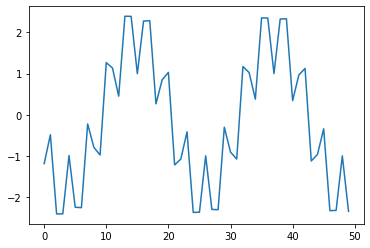

In [3]:
from matplotlib import pyplot as plt

plt.plot(a)